# 의사결정나무 - 분류

In [18]:
#데이터 불러오기
import seaborn as sns #seaborn을 불러오고 네임스페이스를 sns로 축약
iris = sns.load_dataset('iris')  #iris라는 변수명으로 Iris 데이터셋 download

X = iris.drop('species', axis=1) #'species'열을 drop하고 input X를 정의
y_ = iris['species']

In [19]:
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [20]:
#y data를 범주형으로 변환
from sklearn.preprocessing import LabelEncoder
classle = LabelEncoder() #class label
y = classle.fit_transform(iris['species'].values) #species 열의 문자열을 범주형으로 변환

In [21]:
#전체 데이터를 학습과 테스트 데이터셋으로 분리
from sklearn.model_selection import train_test_split

#X(입력변수)와 y(종속변수)로 이루어진 데이터를 학습과 테스트 데이터넷으로 각각 70%, 30%의 비율로 나눔
X_train,X_test,y_train,y_test=train_test_split(X,y, test_size=0.3, random_state=1, stratify=y) 

In [22]:
#분류나무(Classification Tree)
from sklearn.tree import DecisionTreeClassifier 

#과적합 사례 확인해보기: max_depth: 3, 5, 7로 증가시켜 보기
dtc = DecisionTreeClassifier(criterion='gini', max_depth=5, random_state=1)     #깊이 max_depth 너무 깊이가 깊으면 과적합 스스로가 알아서 해야함 / 계수는 이제 본인이 알아서 
#dtc = DecisionTreeClassifier(criterion='entropy', max_depth=7, random_state=1)
dtc.fit(X_train, y_train)
y_train_pred = dtc.predict(X_train)  #Training accuracy
y_test_pred = dtc.predict(X_test)    #Test accuracy

In [23]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_train, y_train_pred))
print(accuracy_score(y_test, y_test_pred))

0.9904761904761905
0.9777777777777777


In [24]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,y_test_pred))

[[15  0  0]
 [ 0 15  0]
 [ 0  1 14]]


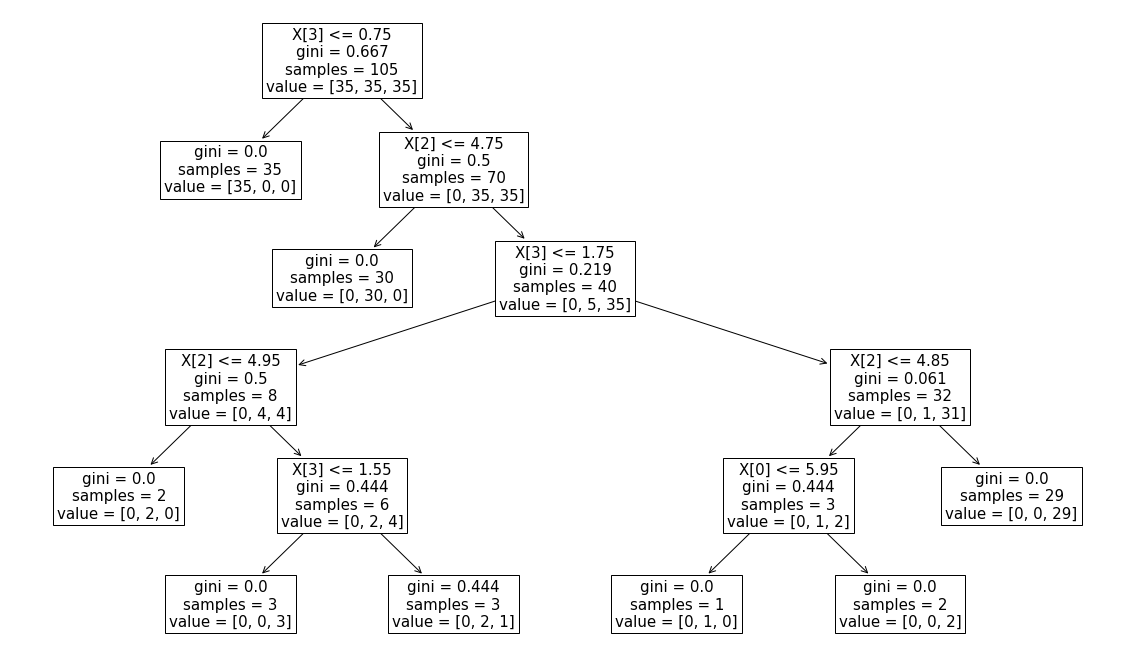

In [25]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(20, 12))


# bbb = plt.subplots(figsize=(25, 12))

plot_tree(dtc, fontsize=15)
plt.savefig('tree_high_dpi', dpi=100)       # 나무 깊이

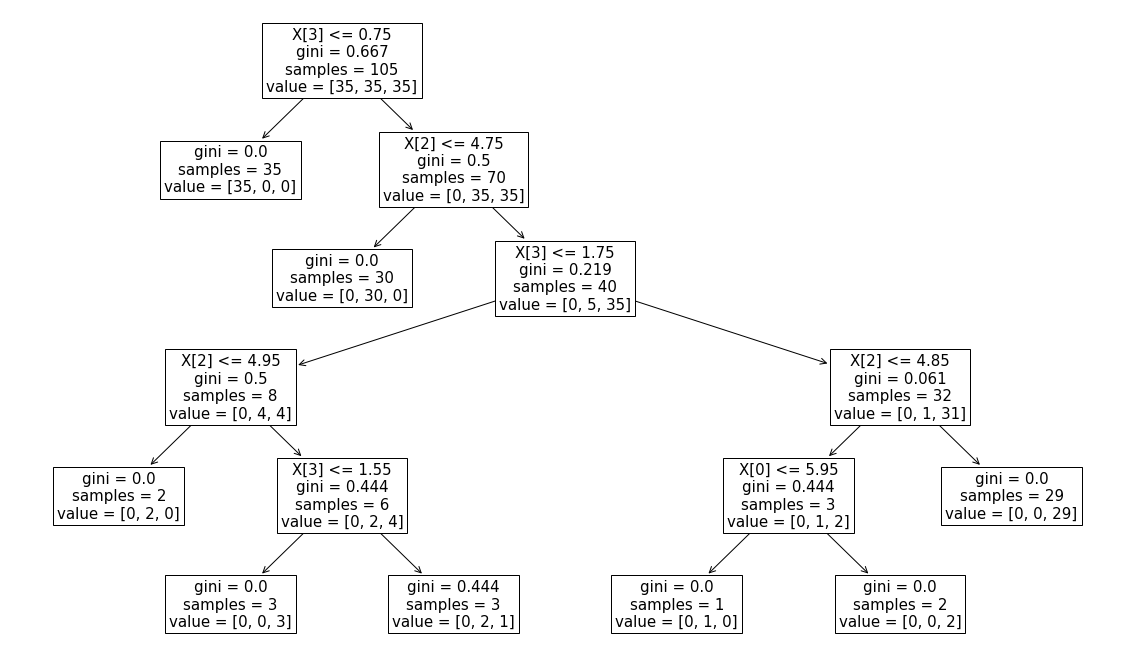

In [26]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(20, 12))


# bbb = plt.subplots(figsize=(25, 12))

plot_tree(dtc, fontsize=15)
plt.savefig('tree_high_dpi', dpi=105)       # 나무 깊이

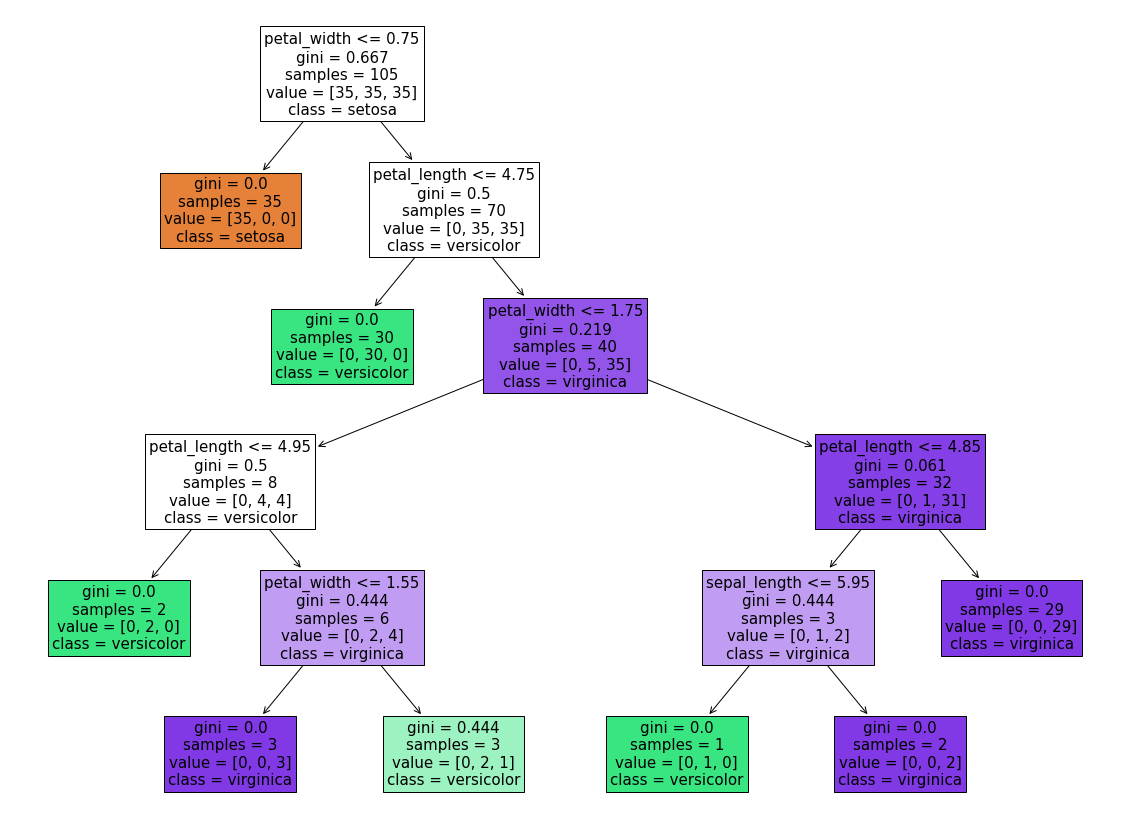

In [27]:
plt.figure(figsize=(20,15))
features = iris.columns[:-1]    # -1 즉, petal_width를 가져오고 features에 넣음 마지막 speices는 종석변수 y이므로 -1 이후만 저장을 함.
classes = ['setosa','versicolor','virginica']
plot_tree(dtc,feature_names=features,class_names=classes,filled=True,fontsize=15)       #각각의 색상은 각 클래스를 의미하며, 흰색은 똑같은 클래스가 들어가 있다는 말.
plt.show()

# 의사결정나무 - 회귀

In [28]:
import numpy as np

#합성데이터 생성하기
rng = np.random.RandomState(1)
X = np.sort(5 * rng.rand(80, 1), axis=0) #Random values in a given shape
y = np.sin(X).ravel()
y[::5] += 3 * (0.5 - rng.rand(16)) #noise 생성



In [29]:
from sklearn.tree import DecisionTreeRegressor

# default : mse 

#Fit regression model
regr_1 = DecisionTreeRegressor(max_depth=2)
regr_2 = DecisionTreeRegressor(max_depth=5)
regr_1.fit(X, y)
regr_2.fit(X, y)

y_pred_1 = regr_1.predict(X)
y_pred_2 = regr_2.predict(X)

In [30]:
from sklearn.metrics import mean_squared_error      # mse   디폴트 옵션

print(mean_squared_error(y, y_pred_1))
print(mean_squared_error(y, y_pred_2))  # 깊이가 긴게 더 좋아보이나, 오버피팅에 유의해야만 함.

0.12967126328231798
0.025236948989861896


In [31]:
#시험데이터로 예측하기

#np.newaxis: insert a new axis(학습데이터와 동일한 shape으로 시험데이터 생성)
X_test = np.arange(0.0, 5.0, 0.01)[:, np.newaxis] 

y_pred_1 = regr_1.predict(X_test)
y_pred_2 = regr_2.predict(X_test)

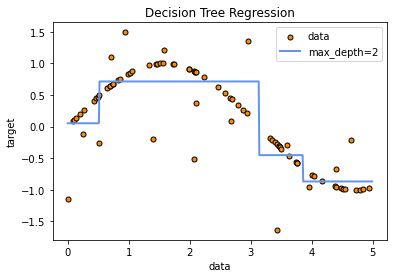

In [34]:

import matplotlib.pyplot as plt

# Plot the results
plt.figure()
plt.scatter(X, y, s=25, edgecolor="black", c="darkorange", label="data")
plt.plot(X_test, y_pred_1, color="cornflowerblue", label="max_depth=2", linewidth=2)
plt.xlabel("data")
plt.ylabel("target")
plt.title("Decision Tree Regression")
plt.legend()
plt.show()

# 3을 기준으로 자르고, 0.5 기준으로 자르고 그 사이 값은 평균값 0.5 미만 부분의 평균값 3 초과의 평균값(의사결정나무 표를 보면 이해 하기 쉬움)

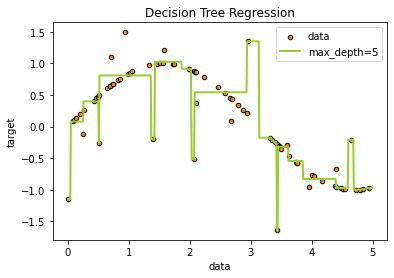

In [33]:
# Plot the results      # depth가 5 노이즈에 영향을 너무 많이 받아서 오버피팅을 보임.
plt.figure()
plt.scatter(X, y, s=20, edgecolor="black", c="darkorange", label="data")
plt.plot(X_test, y_pred_2, color="yellowgreen", label="max_depth=5", linewidth=2)
plt.xlabel("data")
plt.ylabel("target")
plt.title("Decision Tree Regression")
plt.legend()
plt.show()